# Using LSTM to train the dataset

### Importing modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import pickle

### Load the dataset

In [2]:
df = pd.read_csv('modified_transaction_dataset.csv')
df.head()

,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,max value received,avg val received,total transactions (including tnx to create contract,total Ether sent,total ether received,Total ERC20 tnxs,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq rec token name,FLAG
0,1093.71,704785.63,721,89,40,45.806785,6.589513,810,865.691093,586.466675,265.0,54.0,58.0,0.0,57.0,0
1,2958.44,1218216.73,94,8,5,2.613269,0.385685,102,3.087297,3.085478,8.0,5.0,7.0,0.0,7.0,0
2,2434.02,516729.30,2,10,10,1.165453,0.358906,12,3.588616,3.589057,8.0,7.0,8.0,0.0,8.0,0
3,15785.09,397555.90,25,9,7,500.000000,99.488840,34,1750.045862,895.399559,14.0,11.0,11.0,0.0,11.0,0
4,10707.77,382472.42,4598,20,7,12.802411,2.671095,4619,104.318883,53.421897,42.0,23.0,27.0,0.0,27.0,0


### Checking if the dataset is balanced or imbalanced

In [3]:
df['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

In [4]:
print(f'Percentage of non-fraudulent instances : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Percentage of fraudulent instances : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


In [5]:
print(df.isnull().sum())

Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Unique Received From Addresses                          0
max value received                                      0
avg val received                                        0
total transactions (including tnx to create contract    0
total Ether sent                                        0
total ether received                                    0
 Total ERC20 tnxs                                       0
 ERC20 uniq rec addr                                    0
 ERC20 uniq rec contract addr                           0
 ERC20 min val rec                                      0
 ERC20 uniq rec token name                              0
FLAG                                                    0
dtype: int64


### Making data ready for training

In [6]:
X = df.drop(columns=['FLAG'])
y = df['FLAG']
print(X.shape, y.shape)

(9841, 15) (9841,)


In [7]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 15) (7872,)
(1969, 15) (1969,)


### Feature Scaling

In [8]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
# Printing the values of X_train after scaling
sc_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sc_df

,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,max value received,avg val received,total transactions (including tnx to create contract,total Ether sent,total ether received,Total ERC20 tnxs,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq rec token name
0,0.310581,2.851119,0.001530,-0.133464,-0.066047,-0.031784,-0.130116,-0.095517,-0.026374,-0.031246,0.257603,0.198661,1.799837,-0.025533,1.868394
1,-0.339707,-0.675810,-0.153323,-0.176780,-0.106769,-0.043658,-0.183336,-0.211939,-0.028905,-0.033428,-0.075357,-0.075182,-0.214189,-0.025533,-0.217464
2,-0.322958,1.063494,1.620329,1.238207,-0.096588,-0.041094,-0.182633,1.765804,-0.027951,-0.032487,-0.077685,-0.087088,-0.273425,-0.025533,-0.278813
3,0.503169,-0.553119,-0.153323,-0.174717,-0.099982,-0.043563,-0.182076,-0.209770,-0.028905,-0.033426,-0.077685,-0.087088,-0.273425,-0.025533,-0.278813
4,-0.339693,-0.674831,-0.150720,-0.174717,-0.099982,-0.038450,-0.055912,-0.209047,-0.028650,-0.033180,-0.077685,-0.087088,-0.273425,-0.025533,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.320304,-0.672906,-0.152022,-0.174717,-0.099982,-0.043444,-0.179100,-0.209770,-0.028896,-0.033420,-0.075357,-0.075182,-0.214189,-0.025533,-0.217464
7868,-0.250448,0.336370,-0.140310,-0.024143,0.358138,-0.042296,-0.179728,-0.097686,-0.028370,-0.032907,-0.066043,-0.039464,0.022755,-0.025533,0.027931
7869,-0.339707,-0.675610,-0.152022,-0.175749,-0.103375,-0.043642,-0.182894,-0.210493,-0.028904,-0.033428,-0.077685,-0.087088,-0.273425,-0.025533,-0.278813
7870,0.012046,-0.061022,-0.140310,-0.161310,-0.062654,0.158200,0.187543,-0.193861,-0.023335,-0.027996,-0.068372,-0.039464,-0.036481,-0.025451,-0.033418


### Using SMOTE for oversampling

In [10]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {X_train_scaled.shape, y_train.shape}')

Shape of the training before SMOTE: ((7872, 15), (7872,))


In [11]:
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train_scaled, y_train)
print(f'Shape of the training after SMOTE: {X_train_resampled.shape, y_train_resampled.shape}')

Shape of the training after SMOTE: ((12230, 15), (12230,))


In [12]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_train_resampled:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 1757
AFTER OVERSAMPLING 
 	Non-frauds: 6115 
 	Fauds: 6116


### Reshape the input data for LSTM

In [13]:
X_train_lstm = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [14]:
X_train_lstm.shape

(12230, 15, 1)

### Building the LSTM Model

#### Importing modules for LSTM

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
# Initialising the RNN
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])))
regressor.add(Dropout(0.2))

In [34]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences=True))
regressor.add(Dropout(0.2))

In [35]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences=True))
regressor.add(Dropout(0.2))

In [36]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))

In [37]:
# Adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid'))

In [38]:
# Compiling the RNN
regressor.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
# Fitting the RNN to the training set
regressor.fit(X_train_lstm, y_train_resampled, epochs=250, batch_size=32)

Epoch 1/250
383/383 [==============================] - 12s 31ms/step - loss: 0.0351
Epoch 2/250
383/383 [==============================] - 11s 29ms/step - loss: 0.0377
Epoch 3/250
383/383 [==============================] - 11s 29ms/step - loss: 0.0336
Epoch 4/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0358
Epoch 5/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0385
Epoch 6/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0359
Epoch 7/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0343
Epoch 8/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0363
Epoch 9/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0397
Epoch 10/250
383/383 [==============================] - 12s 30ms/step - loss: 0.0384
Epoch 11/250
383/383 [==============================] - 11s 30ms/step - loss: 0.0352
Epoch 12/250
383/383 [==============================] - 12s 30ms/step - lo

In [46]:
# Make predictions on the test set
y_pred_probs = regressor.predict(X_test_lstm)
y_pred = (y_pred_probs > 0.5).astype(int)

62/62 [==============================] - 1s 11ms/step


In [47]:
# Convert predictions to binary (0 or 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

### Evaluating the model

#### 1. Visualizing ROC curve

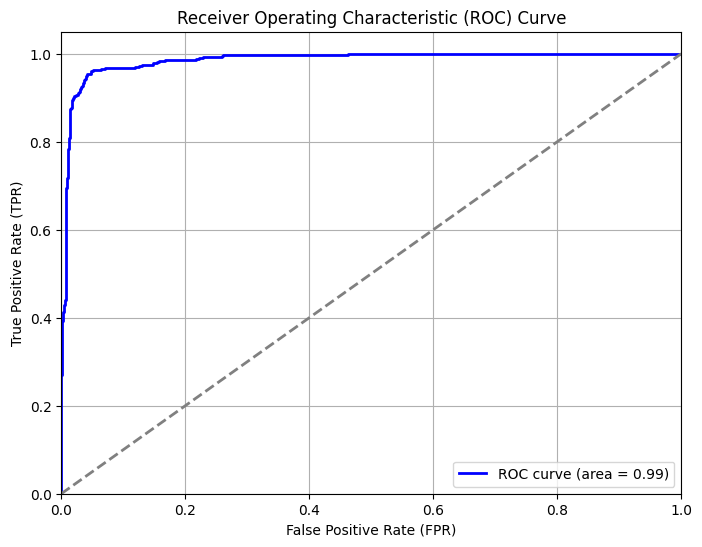

In [51]:
from sklearn.metrics import roc_curve, auc
# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Conclution:

1. AUC value is 0.99 which means the model is doing a better job of distinguishing between the two classes (fraud and non-fraud) than random chance.
2. Since the ROC curve is above the diagonal line, we can say that the model is performing well in capturing legitimate and malicious transactions.

#### 2. Confusion Matrix

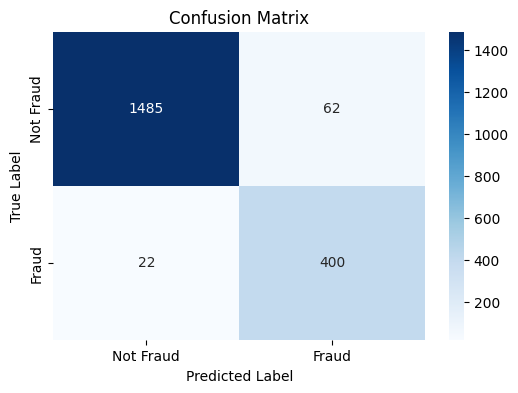

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Conclusion: 

* In this matrix, LSTM 
selects1969 (1485+400+62+22)  random samples,correctly identifying 1885  predictions. This means that the
proposed model efﬁciently discriminates between malicious and legitimate transactions.

#### 3. Classification Report

In [56]:
# Get the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1547
           1       0.87      0.95      0.90       422

    accuracy                           0.96      1969
   macro avg       0.93      0.95      0.94      1969
weighted avg       0.96      0.96      0.96      1969



In [57]:
# Saving the scaler to a file
import joblib
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [58]:
# Saving the model to a file
regressor.save('trained_LSTM_model.h5')

### Hyperparameter tuning using Grid Search

In [16]:
# Creating a function to build the LSTM model
def create_model(dropout_rate=0.0, units=64, num_layers=4):
    model = Sequential()
    for _ in range(num_layers):
        model.add(LSTM(units, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
        model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# Creating KerasClassifier for use with GridSearchCV
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

In [18]:
# Define the hyperparameters to tune
param_grid = {
    'model__dropout_rate': [0.2, 0.3],
    'epochs': [150, 200, 250, 300, 350, 400, 450, 500]
}

In [ ]:
# Perform GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_lstm, y_train_resampled)

In [ ]:
# Get the best hyperparameters and the corresponding accuracy
best_params = grid_result.best_params_
best_accuracy = grid_result.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

In [ ]:
# Make predictions on the test set using the best model
best_model = grid_result.best_estimator_
y_pred_probs = best_model.predict(X_test_lstm)
y_pred = (y_pred_probs > 0.5).astype(int)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
import joblib

In [ ]:
# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')